<a href="https://colab.research.google.com/github/junhochoi-git/python_DataAnaylsis_of_CORONA_Impact/blob/main/%EC%BD%94%EB%A1%9C%EB%82%98_%EC%9D%B4%EC%A0%84%EA%B3%BC_%EC%9D%B4%ED%9B%84_%EC%86%8C%EB%B9%84%EB%82%B4%EC%97%AD_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%B5%9C%EC%A4%80%ED%98%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 코로나 발생 이전과 이후, 신용카드 소비내역 분석을 통한 소비증감 분석하기 
---

### 가설 : 코로나 19 발생 이전 년도(2019년)와 이후 년도(2020년) 1년간의 소비내역 비교 분석해본다.

### 01. Google Drive에 있는 데이터 가져오기 
---

- 먼저 해당 프로젝트가 구동되고 있는 가상머신에서 사용자의 구글드라이브로 mount하도록 한다

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 02. 필요한 라이브러리 import 
---

In [2]:
import io  
import pandas as pd # 데이터 분석에 사용할 pandas
import numpy as np # 수치계산에 사용할 numpy
import seaborn as sns # 시각화를 위한 seaborn 
# > 많은 데이터에 대해선 처리 속도가 느리다.

"""
 파일 경로등을 활용하기 위해
"""
import glob
import os


- 데아터 도식화 관련 라이브러리 로드 및 한글 폰트 설정


In [4]:
# 그래프를 노트북안에 그리기위해
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

- 폰트 설치하기 (최초1회)

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

- 시스템에 있는 폰트 확인하기

In [5]:
sys_font = fm.findSystemFonts()
print(f"sys_font number :  {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number :  48
nanum_font number: 31


- 나눔 폰트 경로 확인하기

In [ ]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fon

- 현재 설정되어 있는 폰트 사이즈와 글꼴 확인

In [8]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
current_font()

Python 3.7.11
설정 폰트 글꼴: ['NanumBarunGothic'], 설정 폰트 사이즈: 10.0


In [7]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 나눔바름고딕
#font_name = fm.FontProperties(fname=path, size=10).get_name()
font = fm.FontProperties(fname=path, size=9)
fm._rebuild()
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [ ]:
# # Google Colab 사용시,
# # 해당 컨테이너에 나눔고딕 설치,
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = "/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
# font = fm.FontProperties(fname=fontpath, size = 10) 
# fm._rebuild()

# #Colab에서 도식에 한글 폰트 설정
# plt.rc("font", family="NanumGothic")
# # 마이너스 폰트 깨지는 문제 해결을 위해
# plt.rc("axes", unicode_minus=False)

### 03. Pandas 로 CSV 파일 읽어오기
---

In [19]:
def data_load(path):
    # 예외처리는 호출시에 적용하기
    print(f"csv 데이터파일 로드... 경로: {path}")
    os.chdir(path)
    return sorted(glob.glob("*"))

def save_to_csv(df, savefile, encoding):
    try:
      df.to_csv(savefile, encoding = encoding)
      print(f"{savefile} 경로에 저장완료")
    except:
      print("저장 경로 오류")
    

#### 병합과정 최초 1회 실행
> 기준년도의 01월 부터 12월까지 별도로 쪼개진 csv파일들에 대해 병합하는 과정<br> `fileDirectory` : 여러 년도의 데이터가 담겨있는 상위 디렉토리 경로 지정<br> `fileName` : 특정 년도의 분할 csv 데이터가 담긴 디렉토리들을 리스트 형태로 선언 및 초기화<br> `year` : 병합할 연도 설정 <br> `savefile` : 병합된 csv파일을 저장할 경로 설정<br> `encoding` : pandas.to_csv() 함수에서 어떤 방식으로 encoding 할지 결정




##### - 2020년 01월 부터 12월까지 데이터를 로드하여 하나의 CSV파일로 병합하기 (최초1회)

In [20]:
#   ! 경로확인 필요 !

fileDirectory = "/content/drive/MyDrive/네이버부스트코스_3조/맞춤형복지_신용카드_소비내역정보_데이터/추가데이터_2019_2020/"
fileName = ["맞춤형복지_신용카드_소비내역정보_2019_여성", "맞춤형복지_신용카드_소비내역정보_2019_남성", "맞춤형복지_신용카드_소비내역정보_2020_여성", "맞춤형복지_신용카드_소비내역정보_2020_남성"]
year = 2020 
savefile = f"../../경로테스트_{year}.csv" 
encoding = "utf-8-sig"
kor_columns = ["번호", "업종명칭", "2차분류코드명", "2차분류코드", "성별", "사용연월", "1차분류코드명", "연령별", "월별소비번호", "사용금액", "사용건수", "1차분류코드"]

#   columns = ['Unnamed: 0', 'crdCoBzkNm', 'sndCtgyNm', 'sndCtgy', 'sxClNm', 'useYymm', 'fstCtgyNm', 'agePrd', 'no', 'crdUseAmt', 'crdUseCnt', 'fstCtgy']
#   fileName[0] : 2019_여성 csv 파일 경로 접근
#   fileName[1] : 2019_남성 csv 파일 경로 접근
#   fileName[2] : 2020_여성 csv 파일 경로 접근 
#   fileName[3] : 2020_남성 csv 파일 경로 접근


path_2020_F = fileDirectory + fileName[2]
path_2020_M = fileDirectory + fileName[3]
load_csvs = [] #  부모 디렉토리에서 하위 디렉토리내 csv파일을 load

try:
    load_csvs = data_load(path_2020_F)
except: 
    print("파일경로 로드 오류")


df_2020 = pd.read_csv(load_csvs[0])   # 사용하고자 하는 dataframe을 선택

#   01월 부터 12월까지 모든 데이터를 한 DataFrame으로 담기 위해서, 다음의 반복문을 거침
#   ignore_index=True를 통해 1년간의 데이터에 대해 번호를 붙여줄 수 있음.
i = 1
while i < len(load_csvs):
  df_2020 = df_2020.append(pd.read_csv(load_csvs[i]), ignore_index=True)
  i += 1

# 데이터 성별B 와 머지과정
i=0
try:
  load_csvs.clear
  load_csvs = data_load(path_2020_M)
except:
  print("파일경로 로드 오류")

while i < len(load_csvs):
  df_2020 = df_2020.append(pd.read_csv(load_csvs[i]), ignore_index=True)
  i += 1


df_2020.columns = kor_columns   # df_2020.columns = kor_columns 모든 Dataframe 을 다 구성하고 실행할 것 
print(df_2020.columns)

df_2020.sort_values("사용연월") # 특정 column 기준으로 정렬

save_to_csv(df_2020, savefile, encoding)  # 특정 파일경로로 csv파일 저장

데이터 로드... 경로: /content/drive/MyDrive/네이버부스트코스_3조/맞춤형복지_신용카드_소비내역정보_데이터/추가데이터_2019_2020/맞춤형복지_신용카드_소비내역정보_2020_여성
데이터 로드... 경로: /content/drive/MyDrive/네이버부스트코스_3조/맞춤형복지_신용카드_소비내역정보_데이터/추가데이터_2019_2020/맞춤형복지_신용카드_소비내역정보_2020_남성
Index(['번호', '업종명칭', '2차분류코드명', '2차분류코드', '성별', '사용연월', '1차분류코드명', '연령별',
       '월별소비번호', '사용금액', '사용건수', '1차분류코드'],
      dtype='object')
../../경로테스트_2020.csv 경로에 저장완료


##### - 2019년 01월 부터 12월까지 데이터를 로드하여 하나의 CSV파일로 병합하기 (최초1회)

In [21]:
#  ! 경로확인 필요 !

fileDirectory = "/content/drive/MyDrive/네이버부스트코스_3조/맞춤형복지_신용카드_소비내역정보_데이터/추가데이터_2019_2020/" 
fileName = ["맞춤형복지_신용카드_소비내역정보_2019_여성", "맞춤형복지_신용카드_소비내역정보_2019_남성", "맞춤형복지_신용카드_소비내역정보_2020_여성", "맞춤형복지_신용카드_소비내역정보_2020_남성"]
year = 2019
savefile = f"../../경로테스트2_{year}.csv" 
encoding = "utf-8-sig"
kor_columns = ["번호", "업종명칭", "2차분류코드명", "2차분류코드", "성별", "사용연월", "1차분류코드명", "연령별", "월별소비번호", "사용금액", "사용건수", "1차분류코드"]

#   columns = ['Unnamed: 0', 'crdCoBzkNm', 'sndCtgyNm', 'sndCtgy', 'sxClNm', 'useYymm', 'fstCtgyNm', 'agePrd', 'no', 'crdUseAmt', 'crdUseCnt', 'fstCtgy']
#   fileName[0] : 2019_여성 csv 파일 경로 접근
#   fileName[1] : 2019_남성 csv 파일 경로 접근
#   fileName[2] : 2020_여성 csv 파일 경로 접근 
#   fileName[3] : 2020_남성 csv 파일 경로 접근

path_2019_F = fileDirectory + fileName[0]
path_2019_M = fileDirectory + fileName[1]
load_csvs = [] #  부모 디렉토리에서 하위 디렉토리내 csv파일을 load

try:
  load_csvs = data_load(path_2019_F)
except:
  print("파일경로 오류")


df_2019 = pd.read_csv(load_csvs[0])   # 사용하고자 하는 dataframe을 선택
#   01월 부터 12월까지 모든 데이터를 한 DataFrame으로 담기 위해서, 다음의 반복문을 거침
#   ignore_index=True를 통해 1년간의 데이터에 대해 번호를 붙여줄 수 있음.
i = 1
while i < len(load_csvs):
  df_2019 = df_2019.append(pd.read_csv(load_csvs[i]), ignore_index=True)
  i += 1

#   데이터 성별B 와 머지과정
i=0
try:
  load_csvs.clear 
  load_csvs = data_load(path_2019_M)
except:
  print("파일경로 오류")

while i < len(load_csvs):
  df_2019 = df_2019.append(pd.read_csv(load_csvs[i]), ignore_index=True)
  i += 1

df_2019.columns = kor_columns   # df_2020.columns = kor_columns 모든 Dataframe 을 다 구성하고 실행할 것 
print(df_2019.columns)

df_2019.sort_values("사용연월")   # 특정 column 기준으로 정렬

save_to_csv(df_2019, savefile, encoding)  # 특정 파일경로로 csv파일 저장

데이터 로드... 경로: /content/drive/MyDrive/네이버부스트코스_3조/맞춤형복지_신용카드_소비내역정보_데이터/추가데이터_2019_2020/맞춤형복지_신용카드_소비내역정보_2019_여성
데이터 로드... 경로: /content/drive/MyDrive/네이버부스트코스_3조/맞춤형복지_신용카드_소비내역정보_데이터/추가데이터_2019_2020/맞춤형복지_신용카드_소비내역정보_2019_남성
Index(['번호', '업종명칭', '2차분류코드명', '2차분류코드', '성별', '사용연월', '1차분류코드명', '연령별',
       '월별소비번호', '사용금액', '사용건수', '1차분류코드'],
      dtype='object')
../../경로테스트2_2019.csv 경로에 저장완료


#### - **(병합 이후)** 통합데이터 Pandas Dataframe으로 로드하기

In [9]:
fileDirectory = "/content/drive/MyDrive/네이버부스트코스_3조/맞춤형복지_신용카드_소비내역정보_데이터/"
fileName = ["맞춤형복지_신용카드_소비내역_통합정보_2020.csv", "맞춤형복지_신용카드_소비내역_통합정보_2019.csv"]

filePath_2020 = fileDirectory + fileName[0]
filePath_2019 = fileDirectory + fileName[1]

df_total_2020 = pd.read_csv(filePath_2020)
df_total_2019 = pd.read_csv(filePath_2019)

### 04. 데이터 결측치 확인
---

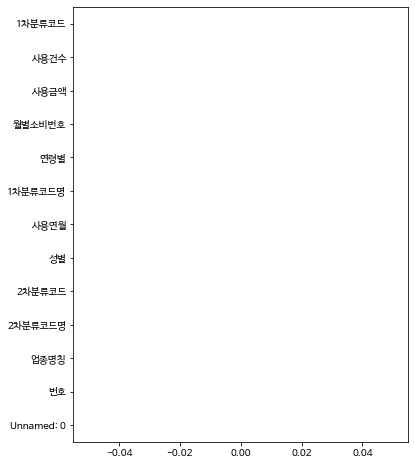

In [11]:
df_total_2020.isnull().sum().plot.barh(figsize=(6,8))
#df_total_2020.isnull().sum()

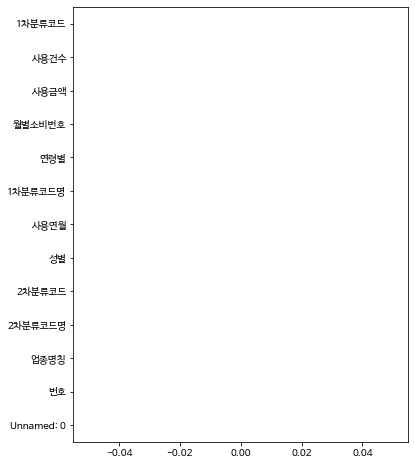

In [10]:
df_total_2019.isnull().sum().plot.barh(figsize=(6,8))
#df_total_2019.isnull().sum()

### 05. 데이터 시각화
---

#### A. 연령별,  사용금액 | 2차분류별 사용금액 | 2차 분류별 사용건수 시각화






##### 2019년 

In [ ]:
df.groupby(["사용연월"])[""]

##### 2020년

#### B. 성별별,  사용금액 | 2차분류별 사용금액 | 2차 분류별 사용건수 시각화

##### 2019년

##### 2020년


#### C. 월별, 사용금액 | 2차분류별 사용금액 | 2차 분류별 사용건수 시각화

##### 2019년

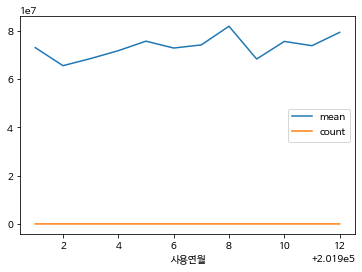

In [12]:
df_total_2019.groupby(["사용연월"])["사용금액"].agg(["mean","count"])

##### 2020년 

In [ ]:
df_total_2020.groupby(["사용연월"])["사용금액"].agg(["mean","count"])

,mean,count
사용연월,,
202001,7.190597e+07,8099
202002,6.707159e+07,8022
202003,6.854405e+07,8022
202004,6.709676e+07,8041
202005,7.305015e+07,8309
202006,6.883088e+07,8314
202007,6.935280e+07,8264
202008,7.437117e+07,8279
202009,6.596565e+07,8169


### 06. 탐색적 데이터 분석 적용하기

### 07. 텐서플로우를 활용하여 데이터 예측해보기

#### (목표)  2019년 2020년 소비데이터를 기준으로, 2021년의 소비데이터를 예측해보고, 실제 2021년의 소비데이터와 비교해본다